In [2]:
import pandas as pd

In [3]:
stats = pd.read_csv("rookie_roy_stats.csv")

In [4]:
stats

,Unnamed: 0,Player,Age,Yrs,G,MP,FG,FGA,3P,3PA,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Year,Pts Won,Pts Max,Share
0,0,Robert Archibald,22,2,44,328,15,53,0,0,...,NaN,0.429,7.5,1.2,1.6,0.4,2003,0.0,0.0,0.000
1,1,Maceo Baston,27,4,105,831,106,172,3,8,...,0.375,0.740,7.9,2.7,1.7,0.2,2003,0.0,0.0,0.000
2,2,Mike Batiste,25,1,75,1248,197,467,18,81,...,0.222,0.784,16.6,6.4,3.4,0.7,2003,0.0,0.0,0.000
3,3,Lonny Baxter,24,4,162,1884,247,530,1,5,...,0.200,0.657,11.6,3.9,2.9,0.2,2003,0.0,0.0,0.000
4,4,Carlos Boozer,21,13,861,26901,5847,11221,1,14,...,0.071,0.722,31.2,16.2,9.5,2.2,2003,1.0,585.0,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,1740,Jalen Williams,21,2,105,3232,619,1182,113,297,...,0.380,0.819,30.8,15.2,4.3,3.5,2023,241.0,500.0,0.482
1741,1741,Jaylin Williams,20,2,77,1246,136,322,65,169,...,0.385,0.754,16.2,5.1,4.3,1.5,2023,0.0,0.0,0.000
1742,1742,Jeenathan Williams,23,2,9,149,30,50,3,10,...,0.300,0.600,16.6,7.3,1.7,1.3,2023,0.0,0.0,0.000
1743,1743,Mark Williams,21,2,62,1336,258,402,0,0,...,NaN,0.702,21.5,10.1,7.9,0.6,2023,0.0,0.0,0.000


In [5]:
del stats["Unnamed: 0"]

In [7]:
pd.isnull(stats).sum()

Player       0
Age          0
Yrs          0
G            0
MP           0
FG           0
FGA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
FG%         18
3P%        167
FT%        121
MP.1         0
PTS.1        0
TRB.1        0
AST.1        0
Year         0
Pts Won      0
Pts Max      0
Share        0
dtype: int64

In [10]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]]

,Player,3PA
0,Robert Archibald,0
24,Nate Huffman,0
30,Ken Johnson,0
39,Chris Owens,0
46,Guy Rucker,0
...,...,...
1675,Chance Comanche,0
1687,Michael Foster Jr.,0
1714,Chima Moneke,0
1738,Alondes Williams,0


In [11]:
stats = stats.fillna(0)

In [12]:
stats.columns

Index(['Player', 'Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
       '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'Year', 'Pts Won',
       'Pts Max', 'Share'],
      dtype='object')

In [13]:
predictors = ['Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
       '3P%', 'FT%', 'Year']

In [14]:
train = stats[stats["Year"] < 2023]

In [15]:
test = stats[stats["Year"] == 2023]

In [16]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [17]:
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [18]:
predictions = reg.predict(test[predictors])

In [19]:
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)

In [20]:
predictions

,predictions
1660,0.005964
1661,0.012535
1662,0.044261
1663,0.011537
1664,0.002177
...,...
1740,0.026600
1741,0.006189
1742,0.018946
1743,0.016848


In [21]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)

In [22]:
combination

,Player,Share,predictions
1660,Ochai Agbaji,0.000,0.005964
1661,Patrick Baldwin Jr.,0.000,0.012535
1662,Paolo Banchero,0.988,0.044261
1663,Dominick Barlow,0.000,0.011537
1664,MarJon Beauchamp,0.000,0.002177
...,...,...,...
1740,Jalen Williams,0.482,0.026600
1741,Jaylin Williams,0.000,0.006189
1742,Jeenathan Williams,0.000,0.018946
1743,Mark Williams,0.000,0.016848


In [23]:
combination.sort_values("Share", ascending=False).head(10)

,Player,Share,predictions
1662,Paolo Banchero,0.988,0.044261
1740,Jalen Williams,0.482,0.026600
1703,Walker Kessler,0.228,0.027345
1709,Bennedict Mathurin,0.054,0.021659
1716,Keegan Murray,0.042,0.020492
1698,Jaden Ivey,0.006,0.032502
1714,Chima Moneke,0.000,0.000235
1721,Jared Rhoden,0.000,0.014612
1720,Lester Quinones,0.000,0.015310
1719,Jason Preston,0.000,0.001519


In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(combination["Share"], combination["predictions"])

0.01353606027286812

In [25]:
combination["Share"].value_counts()

Share
0.000    79
0.988     1
0.006     1
0.228     1
0.054     1
0.042     1
0.482     1
Name: count, dtype: int64

In [27]:
combination = combination.sort_values("Share", ascending=False)
combination["Rk"] = list(range(1,combination.shape[0] + 1))

In [28]:
combination.head(10)

,Player,Share,predictions,Rk
1662,Paolo Banchero,0.988,0.044261,1
1740,Jalen Williams,0.482,0.026600,2
1703,Walker Kessler,0.228,0.027345,3
1709,Bennedict Mathurin,0.054,0.021659,4
1716,Keegan Murray,0.042,0.020492,5
1698,Jaden Ivey,0.006,0.032502,6
1714,Chima Moneke,0.000,0.000235,7
1721,Jared Rhoden,0.000,0.014612,8
1720,Lester Quinones,0.000,0.015310,9
1719,Jason Preston,0.000,0.001519,10


In [29]:
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1,combination.shape[0] + 1))

In [30]:
combination.head(10)

,Player,Share,predictions,Rk,Predicted_Rk
1662,Paolo Banchero,0.988,0.044261,1,1
1698,Jaden Ivey,0.006,0.032502,6,2
1703,Walker Kessler,0.228,0.027345,3,3
1740,Jalen Williams,0.482,0.026600,2,4
1709,Bennedict Mathurin,0.054,0.021659,4,5
1694,Ron Harper Jr.,0.000,0.020962,74,6
1716,Keegan Murray,0.042,0.020492,5,7
1732,Stanley Umude,0.000,0.019397,37,8
1742,Jeenathan Williams,0.000,0.018946,28,9
1713,Isaiah Mobley,0.000,0.018628,15,10


In [31]:
combination.sort_values("Share", ascending=False).head(10)

,Player,Share,predictions,Rk,Predicted_Rk
1662,Paolo Banchero,0.988,0.044261,1,1
1740,Jalen Williams,0.482,0.026600,2,4
1703,Walker Kessler,0.228,0.027345,3,3
1709,Bennedict Mathurin,0.054,0.021659,4,5
1716,Keegan Murray,0.042,0.020492,5,7
1698,Jaden Ivey,0.006,0.032502,6,2
1678,Johnny Davis,0.000,0.007493,49,56
1675,Chance Comanche,0.000,0.005975,52,63
1705,Jake LaRavia,0.000,0.006183,22,62
1741,Jaylin Williams,0.000,0.006189,29,61


In [37]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps) / len(ps)

In [38]:
find_ap(combination)

0.7861904761904762

In [39]:
years = list(range(2003, 2024))

In [40]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors], train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [41]:
sum(aps) / len(aps)

0.5880608971599885

In [49]:
def add_ranks(combination):
    combination = combination.sort_values("Share", ascending=False)
    combination["Rk"] = list(range(1,combination.shape[0] + 1))
    combination = combination.sort_values("predictions", ascending=False)
    combination["Predicted_Rk"] = list(range(1,combination.shape[0] + 1))
    combination["Diff"] = combination["Rk"] - combination["Predicted_Rk"]
    return combination

In [54]:
ranking = add_ranks(all_predictions[1])
ranking[ranking["Rk"] < 6].sort_values("Diff", ascending=False)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
488,Russell Westbrook,0.122,0.489905,4,1,3
465,Brook Lopez,0.212,0.262233,3,3,0
476,Derrick Rose,0.957,0.139550,1,6,-5
448,Eric Gordon,0.037,0.086103,5,12,-7
469,O.J. Mayo,0.410,0.028118,2,18,-16


In [55]:
def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors], train["Share"])
        predictions = reg.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps)/len(aps), aps, pd.concat(all_predictions)

In [59]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [60]:
mean_ap

0.5852884373696208

In [62]:
all_predictions[all_predictions["Rk"] <= 5].sort_values("Diff").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
673,Iman Shumpert,0.055,-0.025158,5,80,-75
1440,Precious Achiuwa,0.000,0.004791,5,56,-51
574,Landry Fields,0.105,-0.004689,4,55,-51
910,Nerlens Noel,0.217,0.003534,3,53,-50
1079,Dario Šarić,0.532,0.007476,2,50,-48
402,Jamario Moon,0.011,-0.001946,5,53,-48
923,Marcus Smart,0.009,0.008889,5,40,-35
907,Nikola Mirotić,0.515,0.012252,2,34,-32
1402,Kendrick Nunn,0.408,0.018434,2,27,-25
1340,Brandon Clarke,0.100,0.020268,4,22,-18


In [71]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
18,0.020819,FG%
20,0.010947,FT%
19,0.009933,3P%
1,0.005662,Yrs
6,0.000168,3P
14,0.000075,BLK
10,0.000050,ORB
12,0.000049,AST
9,0.000037,FTA
5,0.000031,FGA


In [89]:
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())
stat_ratios.reset_index(drop=True, inplace=True) 

In [90]:
stat_ratios

,PTS,AST,STL,BLK,3P,Year
0,0.016676,0.028639,0.061056,0.044337,0.000000,1.0
1,0.093517,0.046539,0.104668,0.317746,0.016838,1.0
2,0.157279,0.093078,0.183169,0.118231,0.101026,1.0
3,0.208288,0.071598,0.161363,0.435977,0.005613,1.0
4,4.569910,3.451042,3.336286,2.556749,0.005613,1.0
...,...,...,...,...,...,...
1740,4.665704,5.574270,5.689142,2.931034,3.067710,1.0
1741,1.137192,1.751478,1.601388,1.055172,1.764612,1.0
1742,0.192943,0.182763,0.168567,0.117241,0.081444,1.0
1743,1.838802,0.609210,1.854239,3.810345,0.000000,1.0


In [91]:
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [92]:
stats

,Player,Age,Yrs,G,MP,FG,FGA,3P,3PA,FT,...,AST.1,Year,Pts Won,Pts Max,Share,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,Robert Archibald,22,2,44,328,15,53,0,0,21,...,0.4,2003,0.0,0.0,0.000,0.016676,0.028639,0.061056,0.044337,0.000000
1,Maceo Baston,27,4,105,831,106,172,3,8,71,...,0.2,2003,0.0,0.0,0.000,0.093517,0.046539,0.104668,0.317746,0.016838
2,Mike Batiste,25,1,75,1248,197,467,18,81,69,...,0.7,2003,0.0,0.0,0.000,0.157279,0.093078,0.183169,0.118231,0.101026
3,Lonny Baxter,24,4,162,1884,247,530,1,5,142,...,0.2,2003,0.0,0.0,0.000,0.208288,0.071598,0.161363,0.435977,0.005613
4,Carlos Boozer,21,13,861,26901,5847,11221,1,14,2281,...,2.2,2003,1.0,585.0,0.002,4.569910,3.451042,3.336286,2.556749,0.005613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Jalen Williams,21,2,105,3232,619,1182,113,297,245,...,3.5,2023,241.0,500.0,0.482,4.665704,5.574270,5.689142,2.931034,3.067710
1741,Jaylin Williams,20,2,77,1246,136,322,65,169,52,...,1.5,2023,0.0,0.0,0.000,1.137192,1.751478,1.601388,1.055172,1.764612
1742,Jeenathan Williams,23,2,9,149,30,50,3,10,3,...,1.3,2023,0.0,0.0,0.000,0.192943,0.182763,0.168567,0.117241,0.081444
1743,Mark Williams,21,2,62,1336,258,402,0,0,113,...,0.6,2023,0.0,0.0,0.000,1.838802,0.609210,1.854239,3.810345,0.000000


In [94]:
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [95]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [96]:
mean_ap

0.548837537654993

In [ ]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [112]:
# training using data from 2003-2022; testing on 2023
# correctly places 4/5 top 5 finishers in the top 5 in Share

predictors = ['Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
       '3P%', 'FT%', 'Year']
train = stats[stats["Year"] < 2023]
test = stats[stats["Year"] == 2023]
reg = Ridge(alpha=.1)
reg.fit(train[predictors], train["Share"])
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
combination.sort_values("Share", ascending=False).head(10)
combination["Share"].value_counts()
combination = combination.sort_values("Share", ascending=False)
combination["Rk"] = list(range(1,combination.shape[0] + 1))
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1,combination.shape[0] + 1))
combination.sort_values("Share", ascending=False).head(10)
find_ap(combination)


0.7861904761904762

In [113]:
combination.head(10)

,Player,Share,predictions,Rk,Predicted_Rk
1662,Paolo Banchero,0.988,0.044261,1,1
1698,Jaden Ivey,0.006,0.032502,6,2
1703,Walker Kessler,0.228,0.027345,3,3
1740,Jalen Williams,0.482,0.026600,2,4
1709,Bennedict Mathurin,0.054,0.021659,4,5
1694,Ron Harper Jr.,0.000,0.020962,74,6
1716,Keegan Murray,0.042,0.020492,5,7
1732,Stanley Umude,0.000,0.019397,37,8
1742,Jeenathan Williams,0.000,0.018946,28,9
1713,Isaiah Mobley,0.000,0.018628,15,10


In [116]:
current = pd.read_csv("cleaned_current_rookies.csv")

In [117]:
current

,Unnamed: 0,Player,Age,Yrs,G,MP,FG,FGA,3P,3PA,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Year
0,0,Ibou Badji,21,1,5,65,5,7,0,0,...,18,13,0.714,NaN,0.750,13.0,2.6,4.0,0.4,2023
1,1,Amari Bailey,19,1,2,11,2,6,0,2,...,0,5,0.333,0.000,0.500,5.5,2.5,1.0,0.0,2023
2,2,Emoni Bates,20,1,10,76,6,25,5,20,...,5,18,0.240,0.250,0.500,7.6,1.8,1.0,0.6,2023
3,3,Jules Bernard,24,1,2,10,1,5,0,3,...,1,2,0.200,0.000,NaN,5.0,1.0,0.5,0.5,2023
4,4,Onuralp Bitim,24,1,1,3,0,0,0,0,...,0,0,NaN,NaN,NaN,3.0,0.0,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,81,Jarace Walker,20,1,10,87,12,28,3,11,...,11,33,0.429,0.273,0.857,8.7,3.3,1.2,1.1,2023
76,82,Cason Wallace,20,1,33,712,89,166,35,81,...,58,229,0.536,0.432,0.842,21.6,6.9,2.1,1.5,2023
77,83,Victor Wembanyama,20,1,30,879,214,477,44,151,...,69,575,0.449,0.291,0.786,29.3,19.2,10.1,2.8,2023
78,84,Cam Whitmore,19,1,9,88,25,46,9,21,...,9,66,0.543,0.429,0.500,9.8,7.3,2.1,0.3,2023


In [119]:
del current["Unnamed: 0"]
current = current.fillna(0)


KeyError: 'Unnamed: 0'

In [120]:
current

,Player,Age,Yrs,G,MP,FG,FGA,3P,3PA,FT,...,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Year
0,Ibou Badji,21,1,5,65,5,7,0,0,3,...,18,13,0.714,0.000,0.750,13.0,2.6,4.0,0.4,2023
1,Amari Bailey,19,1,2,11,2,6,0,2,1,...,0,5,0.333,0.000,0.500,5.5,2.5,1.0,0.0,2023
2,Emoni Bates,20,1,10,76,6,25,5,20,1,...,5,18,0.240,0.250,0.500,7.6,1.8,1.0,0.6,2023
3,Jules Bernard,24,1,2,10,1,5,0,3,0,...,1,2,0.200,0.000,0.000,5.0,1.0,0.5,0.5,2023
4,Onuralp Bitim,24,1,1,3,0,0,0,0,0,...,0,0,0.000,0.000,0.000,3.0,0.0,0.0,0.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Jarace Walker,20,1,10,87,12,28,3,11,6,...,11,33,0.429,0.273,0.857,8.7,3.3,1.2,1.1,2023
76,Cason Wallace,20,1,33,712,89,166,35,81,16,...,58,229,0.536,0.432,0.842,21.6,6.9,2.1,1.5,2023
77,Victor Wembanyama,20,1,30,879,214,477,44,151,103,...,69,575,0.449,0.291,0.786,29.3,19.2,10.1,2.8,2023
78,Cam Whitmore,19,1,9,88,25,46,9,21,7,...,9,66,0.543,0.429,0.500,9.8,7.3,2.1,0.3,2023


In [122]:
current['Share'] = 0

In [137]:
# training using data from 2003-2023; testing on current season (2024)
# Using data up to January 6, 2024

# predictors = ['Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT',
#        'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%',
#        '3P%', 'FT%', 'Year']
# predictors = ['TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
predictors = ['G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
train = stats[stats["Year"] <= 2023]
test = current
reg = Ridge(alpha=.1)
reg.fit(train[predictors], train["Share"])
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
combination.sort_values("Share", ascending=False).head(10)
# combination["Share"].value_counts()
combination = combination.sort_values("Share", ascending=False)
# combination["Rk"] = list(range(1,combination.shape[0] + 1))
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1,combination.shape[0] + 1))
# combination.sort_values("Share", ascending=False).head(10)
# find_ap(combination)

In [141]:
finalchart = combination[['Player', 'predictions', 'Predicted_Rk']].head(60)

In [142]:
finalchart

,Player,predictions,Predicted_Rk
77,Victor Wembanyama,0.026574,1
28,Chet Holmgren,0.025638,2
44,Brandon Miller,0.018171,3
25,Scoot Henderson,0.016814,4
21,Keyonte George,0.016742,5
54,Brandin Podziemski,0.015595,6
34,Jaime Jaquez Jr.,0.015353,7
55,Craig Porter Jr.,0.015276,8
67,Nick Smith Jr.,0.014393,9
62,Marcus Sasser,0.014257,10


<Axes: xlabel='Player'>

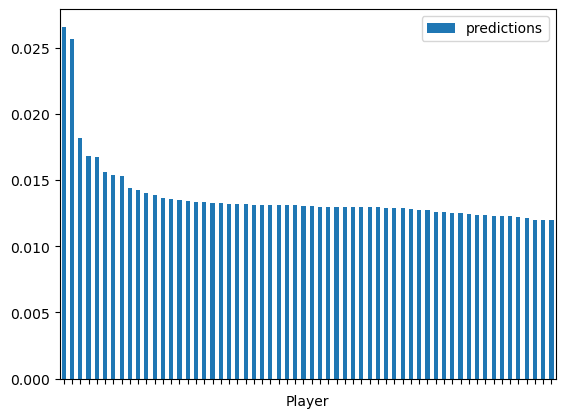

In [151]:
ax = finalchart.plot.bar(x='Player', y='predictions')
ax.set_xticklabels([])
ax

<Axes: xlabel='Player'>

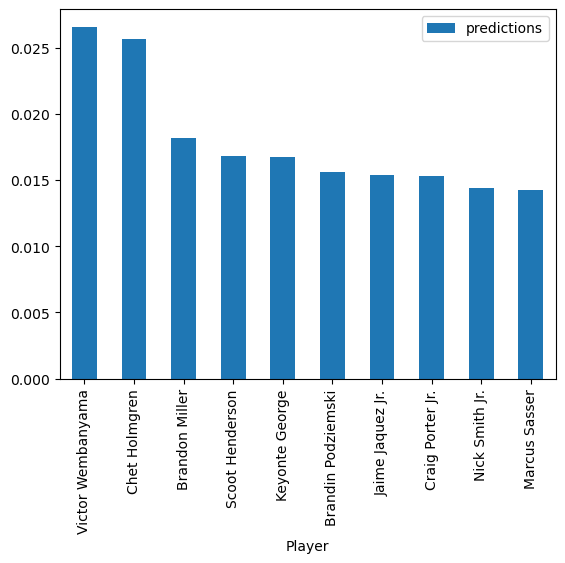

In [152]:
finalchart.nlargest(10, 'predictions').plot.bar(x='Player', y='predictions')